In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True) #matplotlib에 기반한 시각화
import matplotlib.pylab as plt
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf # 회귀분석 지월
import seaborn as sns; sns.set(style="ticks", color_codes=True) #matplotlib에 기반한 시각화

from statsmodels.stats.multicomp import pairwise_tukeyhsd##사후분석, 가중비교, 누구랑 누가 차이가 있는지
from sklearn.model_selection import train_test_split #test와 train set분리를 위해


c:\python27\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("file/train_mod.csv")
df.head() # train데이터 로드


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,117,TOYOTA Corolla 2.0 D4D 90 WAGON SOL Stationwagen,24990,8,1,2004,6000,Diesel,90,1,...,1,1,0,0,1,1,1,0,0,0
1,114,TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV,24950,8,1,2004,13253,Diesel,116,1,...,1,1,0,0,0,0,0,0,0,0
2,115,TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV,24950,8,1,2004,13253,Diesel,116,1,...,1,1,0,0,0,0,0,0,0,0
3,149,TOYOTA Corolla 1.6 16V VVT I 5DR EXEC BNS 4/5-...,24500,13,8,2003,19988,Petrol,110,1,...,1,1,0,1,1,1,1,0,0,0
4,143,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 4/5-Doors,23950,19,2,2003,21684,Petrol,192,1,...,1,1,1,0,0,0,1,1,0,0


In [3]:
cols_real = ['Age_08_04','Mfg_Year','KM','HP','CC','Doors','Cylinders','Gears','Quarterly_Tax','Weight','Guarantee_Period']

# 양적자료 11개

cols_cat=['Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
            'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2',
            'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
            'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'
           ]

#질적자료 25개

In [4]:
# 독립변수 DataFrame 

dfR = df[cols_real] # 양적변수 DataFrame
dfC = df[cols_cat] #질적변수 DataFrame
X = pd.concat([dfR, dfC], axis = 1)
X.head()
print type(X)

<class 'pandas.core.frame.DataFrame'>


In [5]:
# 종속변수 DataFrame
val = ['Price', 'Id']

y = pd.DataFrame(df[val])

y.head()


,Price,Id
0,24990,117
1,24950,114
2,24950,115
3,24500,149
4,23950,143


# 1. 자료의 구성 (Data Set)

* Train set
<p> X_train, y_train
* Test set (여기서는 validation set을 의미)
<p> X_test, y_test

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

print X_train.shape, X_test.shape # 독립변수 train set과 validation set의 개수
print y_train.shape, y_test.shape # 종속변수 train set과 validation set의 개수



(764, 36) (255, 36)
(764, 2) (255, 2)


In [72]:
X_train.head()

,Age_08_04,Mfg_Year,KM,HP,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
160,41,2001,50856,110,1600,4,4,5,69,1030,...,1,1,1,0,0,0,0,1,0,1
876,73,1998,134539,110,1600,5,4,5,85,1070,...,1,1,0,0,0,1,0,0,0,1
935,80,1998,66880,110,1600,3,4,5,85,1055,...,1,1,0,1,0,1,1,0,0,1
347,68,1999,67146,110,1600,5,4,5,85,1075,...,1,1,0,1,0,1,1,0,0,1
924,58,1999,54000,86,1300,5,4,5,69,1035,...,0,1,0,0,1,1,0,0,0,0


# 2. 변수 탐색

## 1) Price와 양적변수와의 분포

11개의 양적변수, 4개씩 나눠서 산포도

In [73]:
#sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[:3]]], axis=1),size=3)
#plt.show()
sns_plot = sns.pairplot(pd.concat([ y_train, X_train[cols_real[:3]]], axis=1),size=3)
#plt.show()

In [74]:
sns_plot = sns.pairplot(pd.concat([ y_train, X_train[cols_real[3:6]]], axis=1),size=3)
#plt.show()

In [75]:

sns_plot = sns.pairplot(pd.concat([ y_train, X_train[cols_real[6:9]]], axis=1),size=3)
#plt.show()

In [76]:
sns_plot = sns.pairplot(pd.concat([ y_train, X_train[cols_real[9:12]]], axis=1),size=3)
#plt.show()

## 2) 양적변수간의 분포

In [77]:
sns_plot = sns.pairplot(pd.concat([X_train[cols_real[:6]], X_train[cols_real[6:12]]], axis=1))
#plt.show()
#sns.reset_orig()

## 3)질적변수 Boxplot

In [78]:
cols_cat = ['CC', 'Doors', 'Cylinders', 'Gears', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 
            'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 
            'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 
            'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

#'CC', 'Doors', 'Cylinders', 'gears'를 포함하여 총 29개
len (cols_cat)

29

In [79]:
def display_multi_boxplots(start_feature_name, row, col ):
    with plt.style.context(('seaborn-white')): # 단순 스타일 적용
        f, axes = plt.subplots(row, col, figsize=(2.3*col, 3.5*row), sharey=True)
        
        nums = row * col
        start_idx = cols_cat.index(start_feature_name) #받아온 값의 인덱스를 구한다
        
        for num, ax in zip(range(nums), axes.flat):
            try:
                sns.boxplot(x=X_train[cols_cat[start_idx+num]], y=y_train['Price'], palette='Set3', ax=ax)
                
            except: 
                pass

### 3-1) Boxplots 1

In [80]:
display_multi_boxplots('CC',3,3)
#plt.show()

### 3-2) Boxplots 2 

In [81]:


display_multi_boxplots('Mfr_Guarantee',3,3)
#plt.show()


### 3-3) Boxplots 3

In [82]:
display_multi_boxplots('Central_Lock',3,3)
#plt.show()


### 3-4) Boxplots 4

In [83]:

display_multi_boxplots('Parking_Assistant',1,2)
#plt.show()

## 4) 상관 계수

In [84]:

# 7개 변수
cols_real = ['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']
# 28개 변수
cols_cat = ['CC', 'Doors', 'Gears', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 
            'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 
            'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 
            'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']
#Cylinder삭제
print len(cols_real), len(cols_cat)

7 28


In [85]:
train_set = pd.concat([y_train, X_train[cols_real] ], axis = 1)

corrmat = train_set.corr()
corrmat

,Price,Id,Age_08_04,Mfg_Year,KM,HP,Quarterly_Tax,Weight,Guarantee_Period
Price,1.000000,-0.752488,-0.885460,0.894784,-0.561925,0.300042,0.168405,0.512317,0.169925
Id,-0.752488,1.000000,0.905486,-0.919128,0.263153,-0.083449,-0.235238,-0.399438,-0.123053
Age_08_04,-0.885460,0.905486,1.000000,-0.983341,0.497051,-0.147630,-0.173915,-0.435504,-0.181447
Mfg_Year,0.894784,-0.919128,-0.983341,1.000000,-0.498251,0.152686,0.171600,0.442267,0.177536
KM,-0.561925,0.263153,0.497051,-0.498251,1.000000,-0.364218,0.315523,0.022244,-0.144879
HP,0.300042,-0.083449,-0.147630,0.152686,-0.364218,1.000000,-0.357973,0.049417,0.089508
Quarterly_Tax,0.168405,-0.235238,-0.173915,0.171600,0.315523,-0.357973,1.000000,0.584696,-0.151231
Weight,0.512317,-0.399438,-0.435504,0.442267,0.022244,0.049417,0.584696,1.000000,-0.007216
Guarantee_Period,0.169925,-0.123053,-0.181447,0.177536,-0.144879,0.089508,-0.151231,-0.007216,1.000000


In [86]:
f, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale=1.5)
hm = sns.heatmap(corrmat, cbar=True, annot=True, fmt='.2f',
                annot_kws={'size':10}
               )
#annot=상관계수 표시 / fmt=소수점둘째자리 / 
#plt.show()

In [87]:
train_set.describe()

,Price,Id,Age_08_04,Mfg_Year,KM,HP,Quarterly_Tax,Weight,Guarantee_Period
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,10686.265707,720.210733,56.100785,1999.628272,68426.229058,101.267016,87.640052,1072.278796,3.755236
std,3500.944478,412.192763,18.452420,1.529281,38316.242124,14.514038,40.002785,52.760117,2.884230
min,4350.000000,2.000000,1.000000,1998.000000,1.000000,69.000000,19.000000,1000.000000,3.000000
25%,8450.000000,362.750000,44.000000,1998.000000,40629.500000,86.000000,69.000000,1040.000000,3.000000
50%,9800.000000,720.000000,61.000000,1999.000000,63000.000000,110.000000,85.000000,1070.000000,3.000000
75%,11896.250000,1067.250000,69.250000,2001.000000,86095.250000,110.000000,85.000000,1085.000000,3.000000
max,24990.000000,1442.000000,80.000000,2004.000000,243000.000000,192.000000,283.000000,1615.000000,36.000000


## 5) Price 기술통계량 살펴보기

In [88]:
y_train.describe()

,Price,Id
count,764.000000,764.000000
mean,10686.265707,720.210733
std,3500.944478,412.192763
min,4350.000000,2.000000
25%,8450.000000,362.750000
50%,9800.000000,720.000000
75%,11896.250000,1067.250000
max,24990.000000,1442.000000


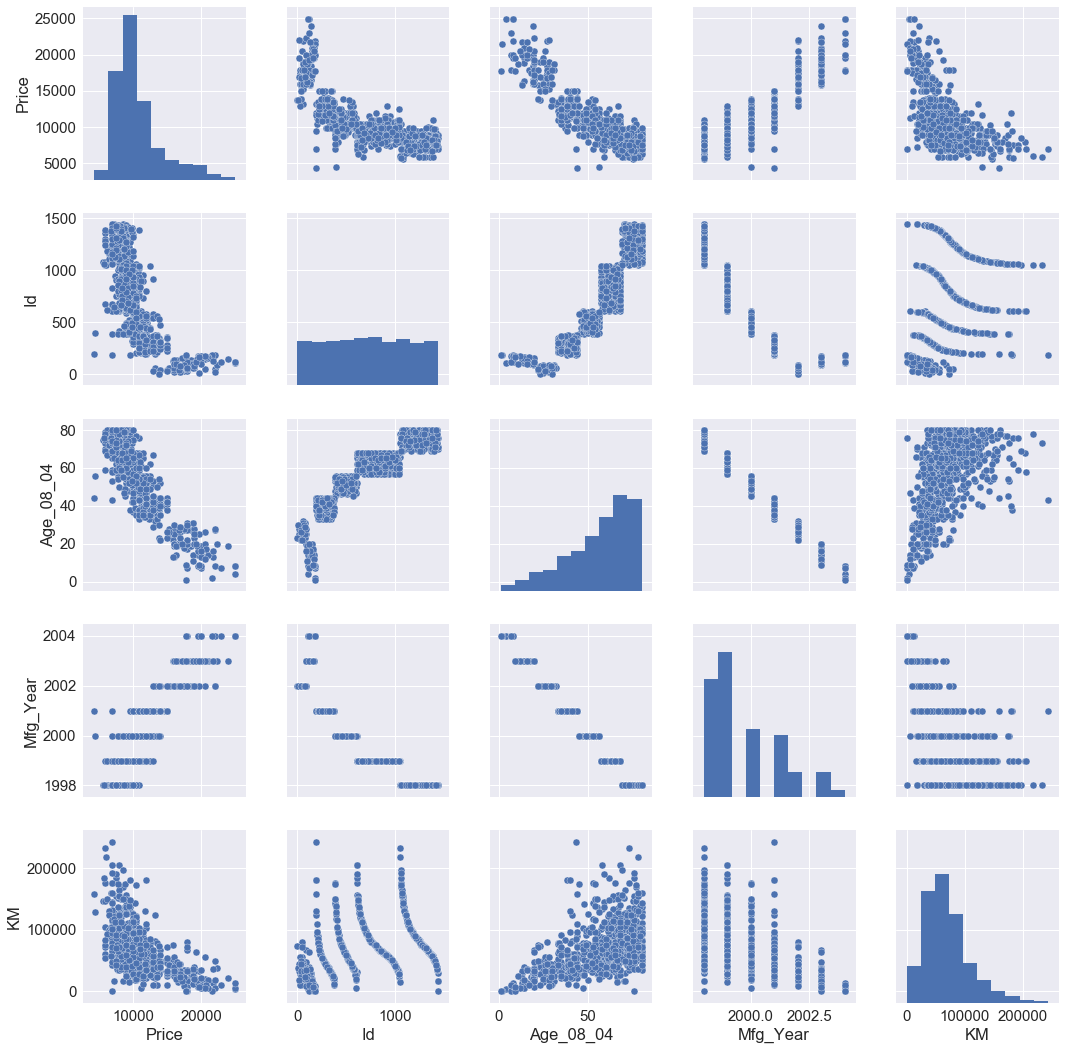

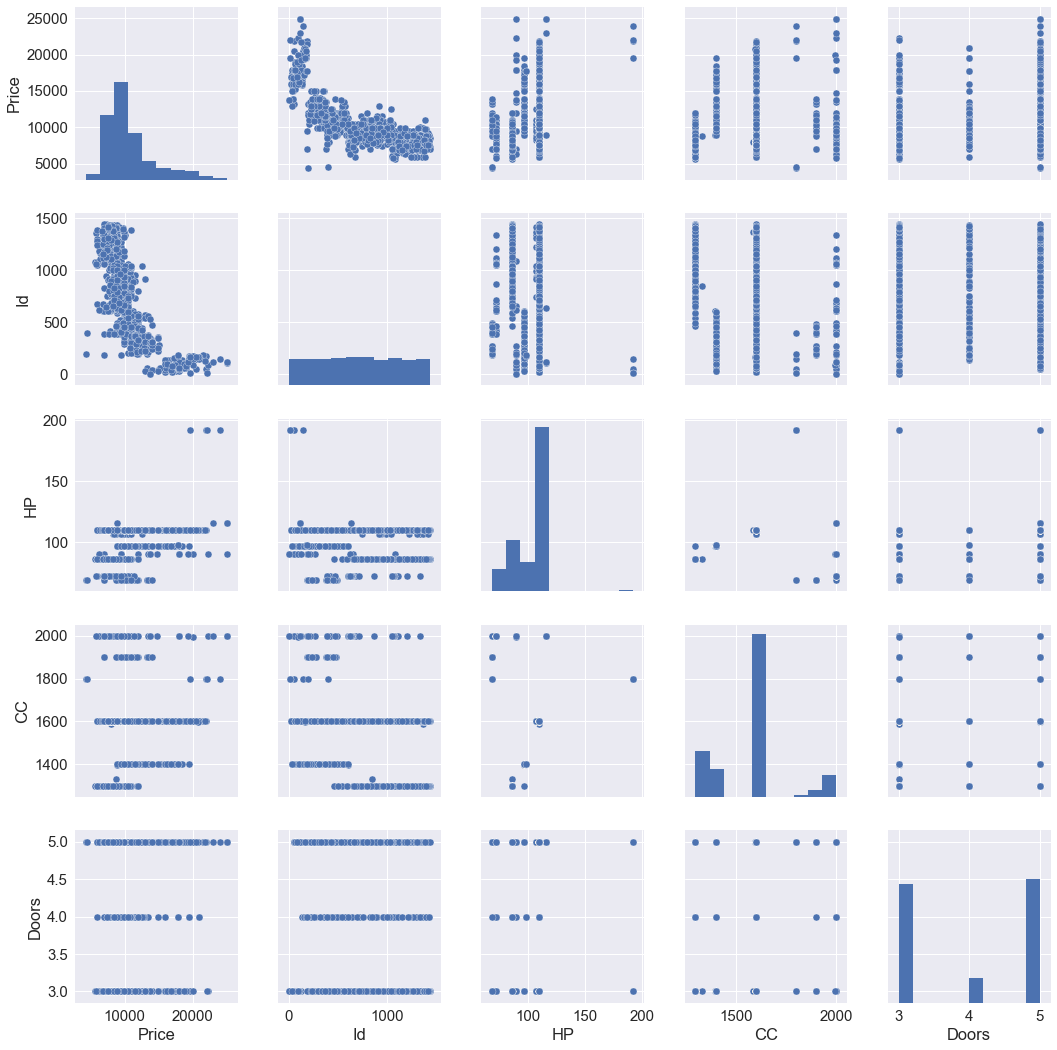

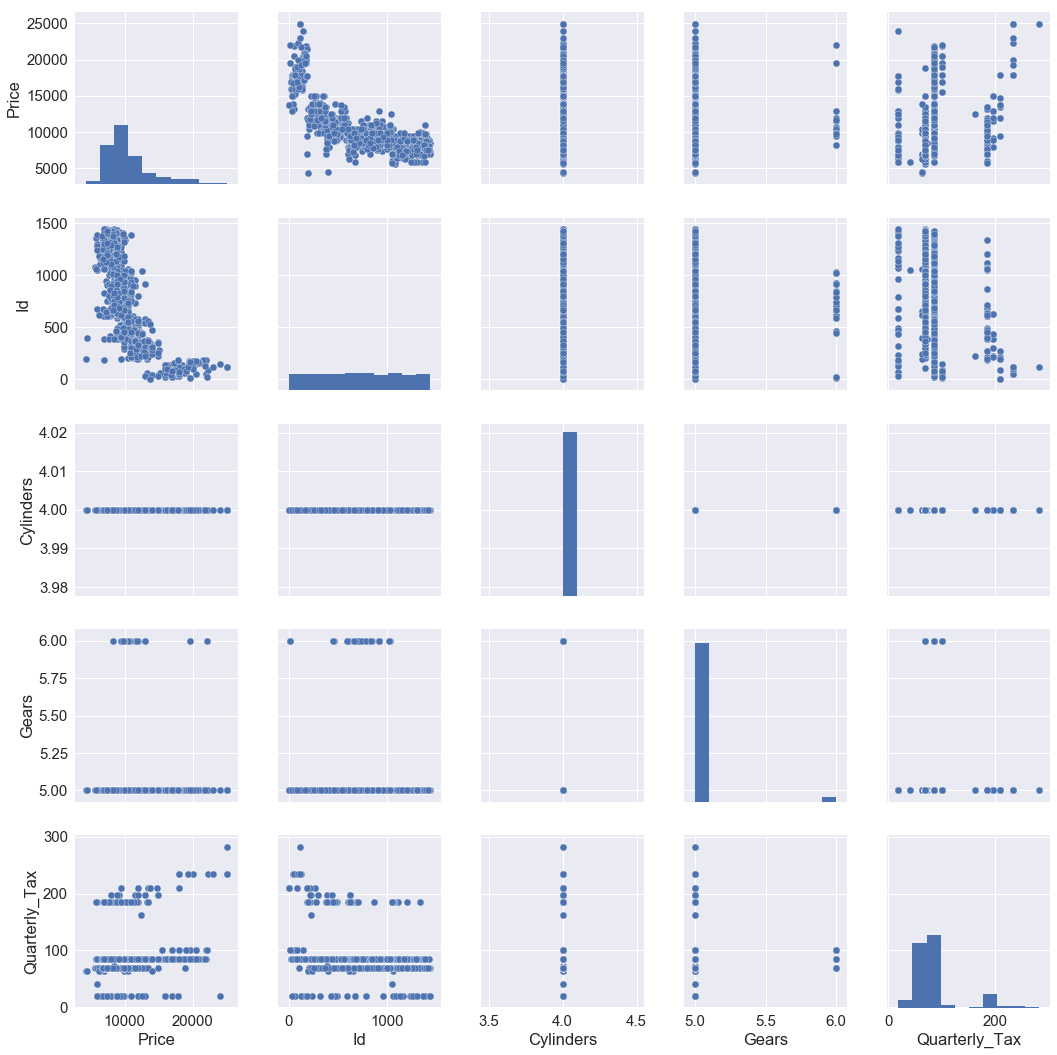

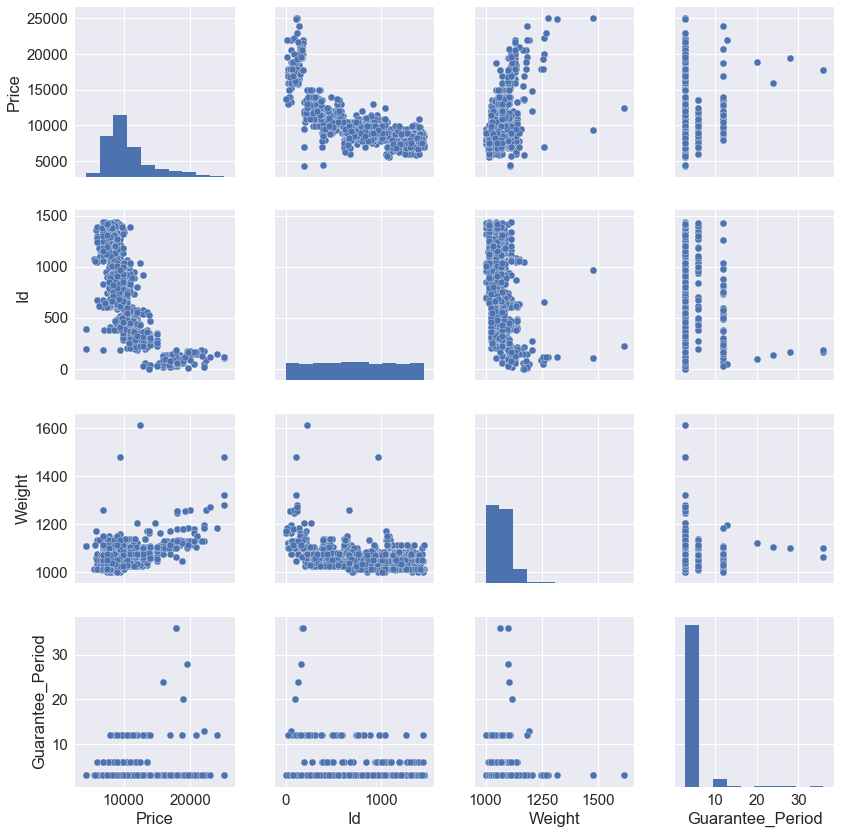

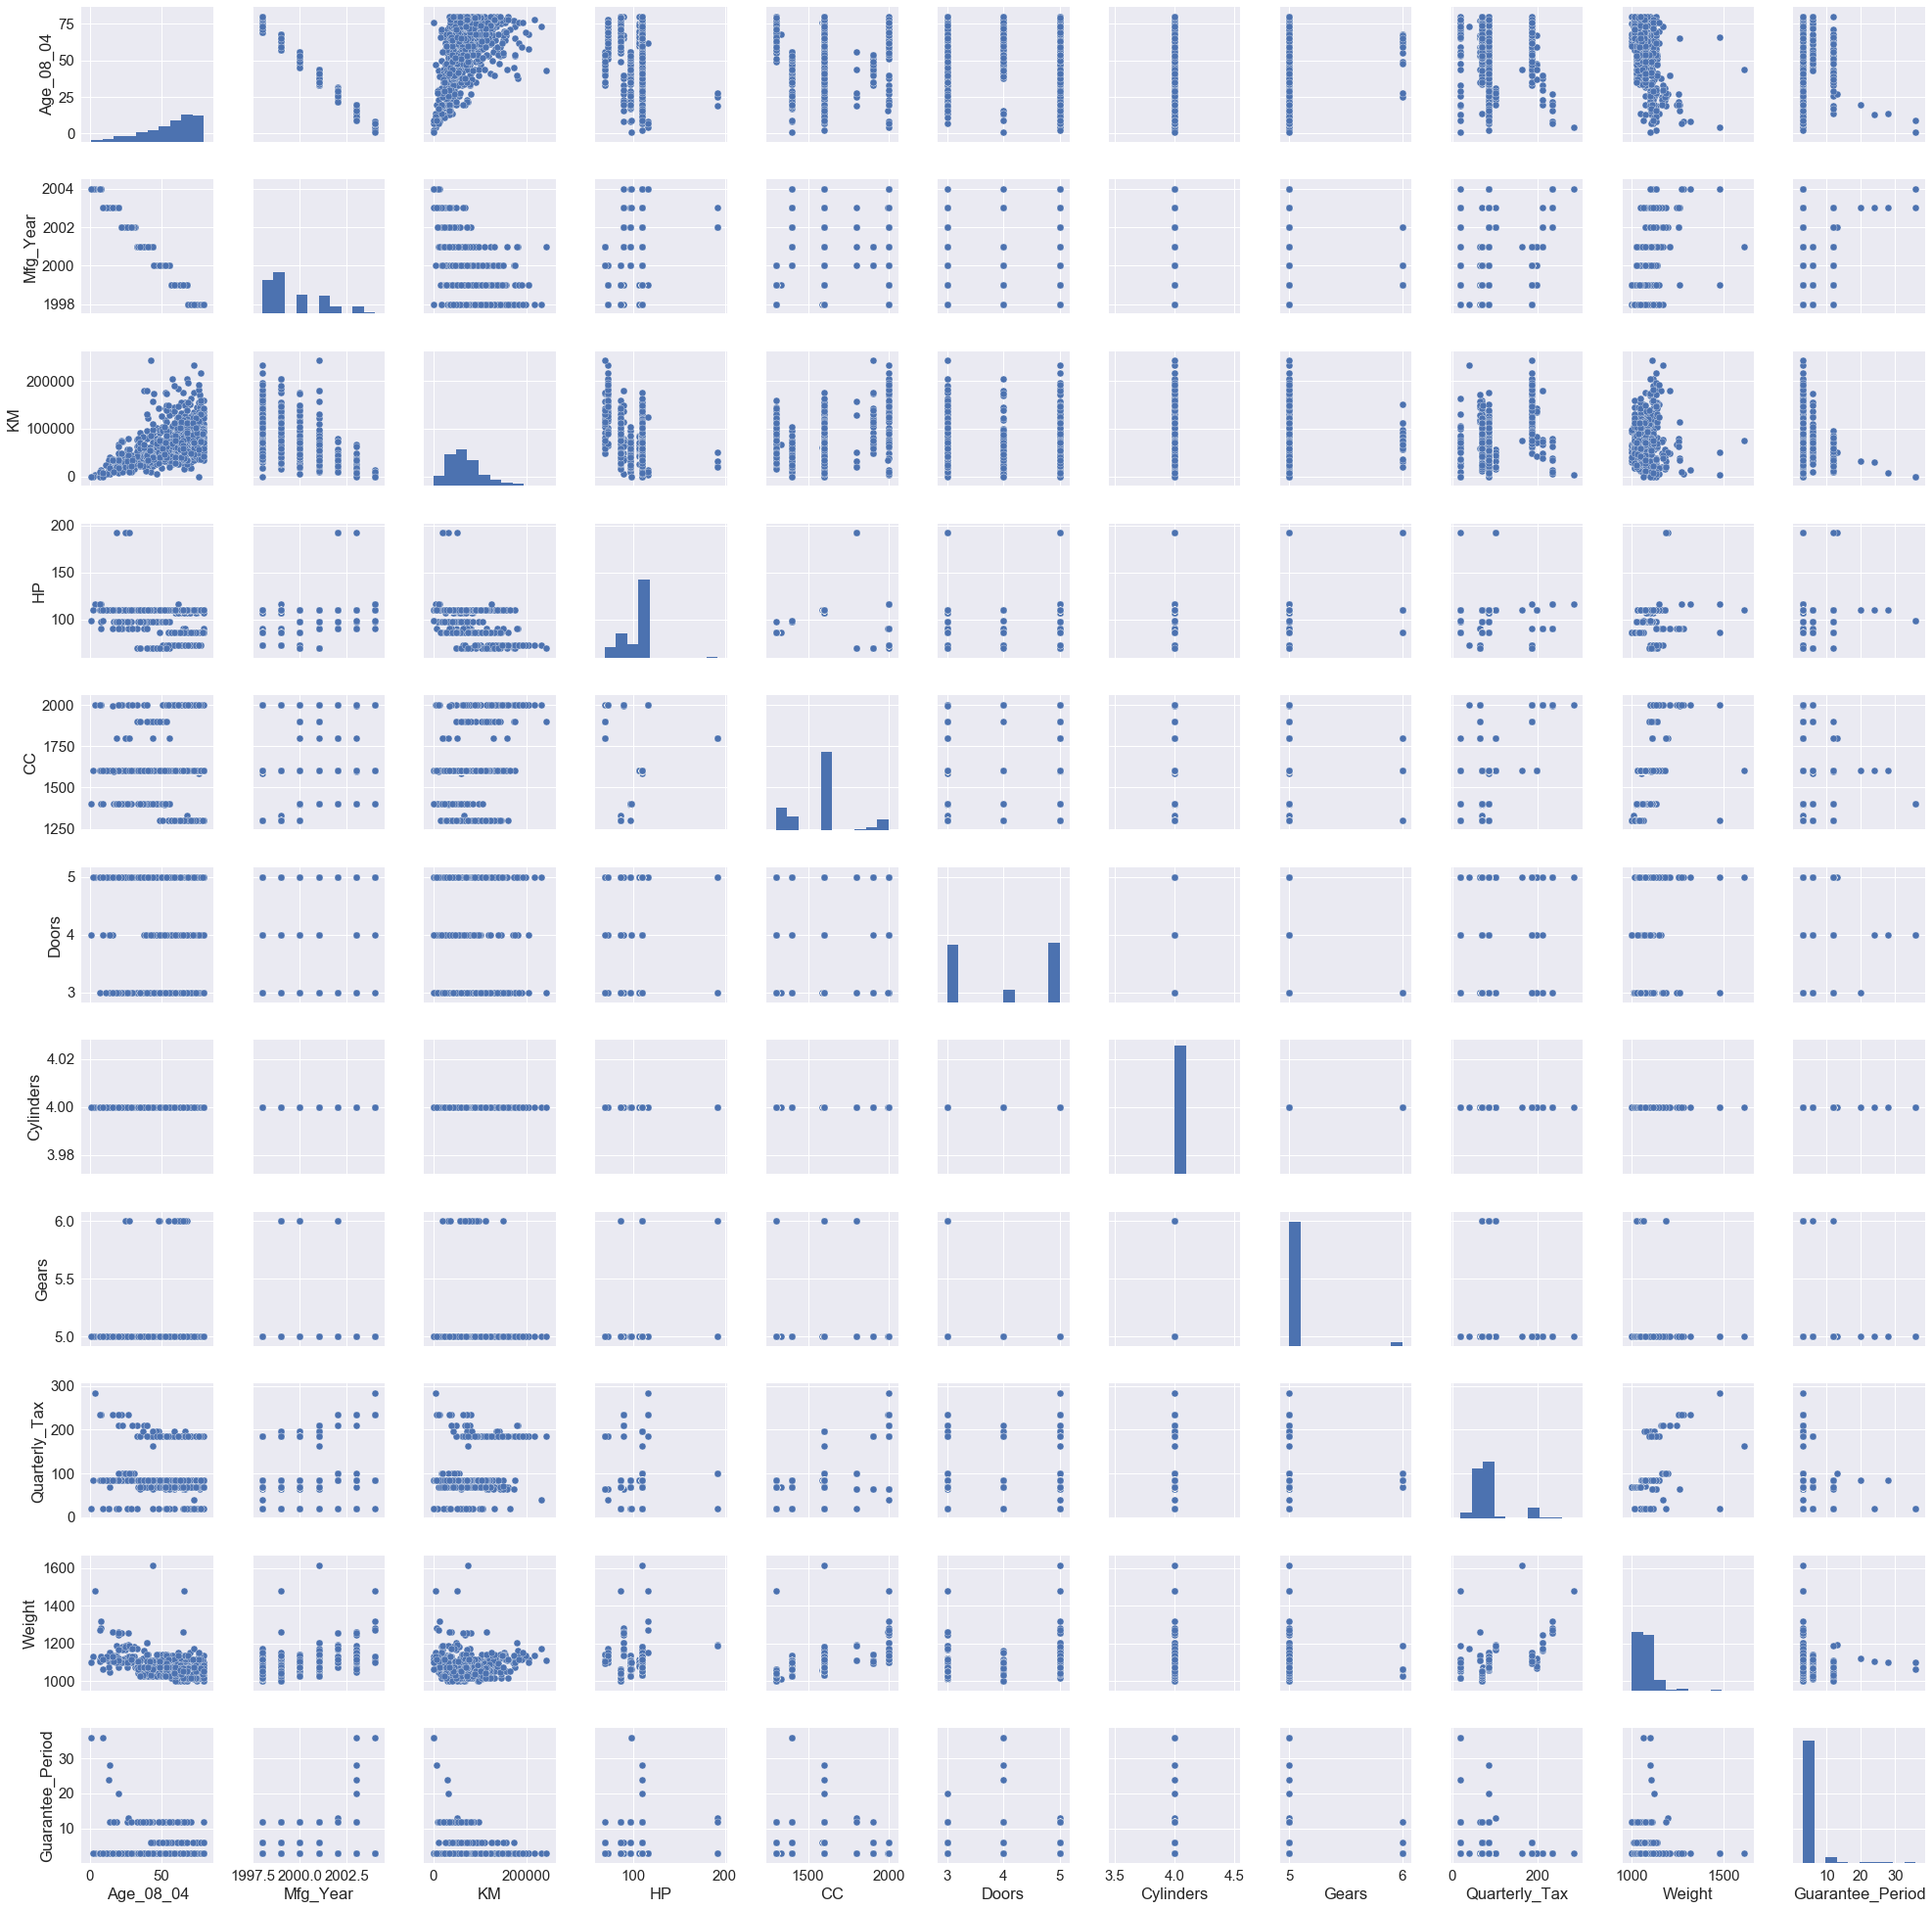

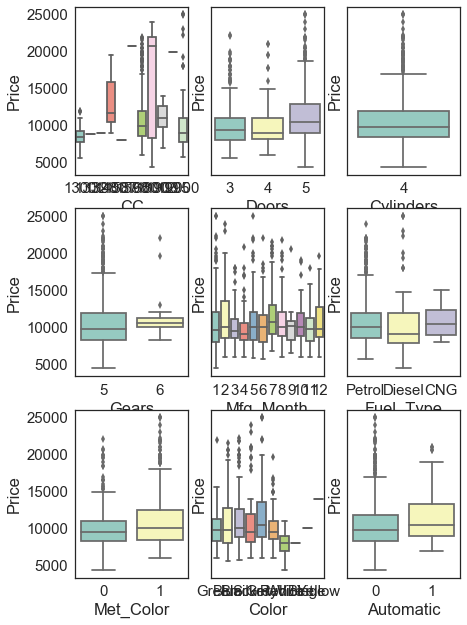

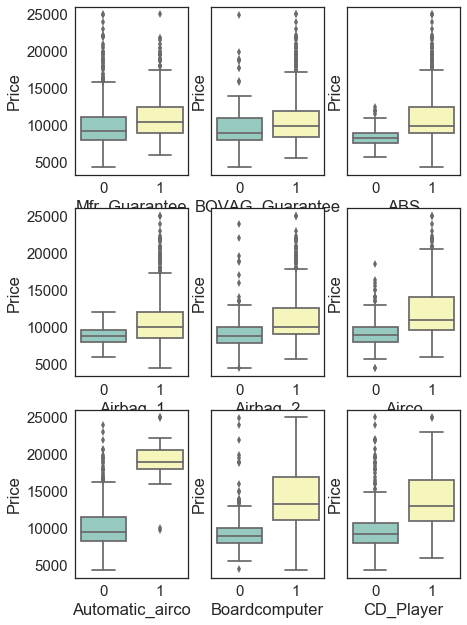

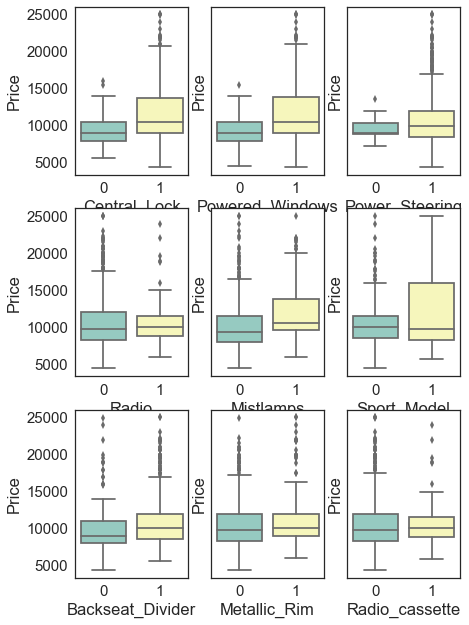

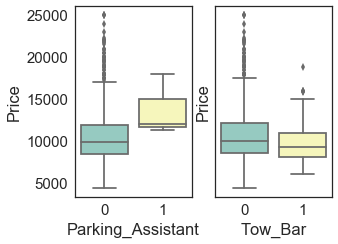

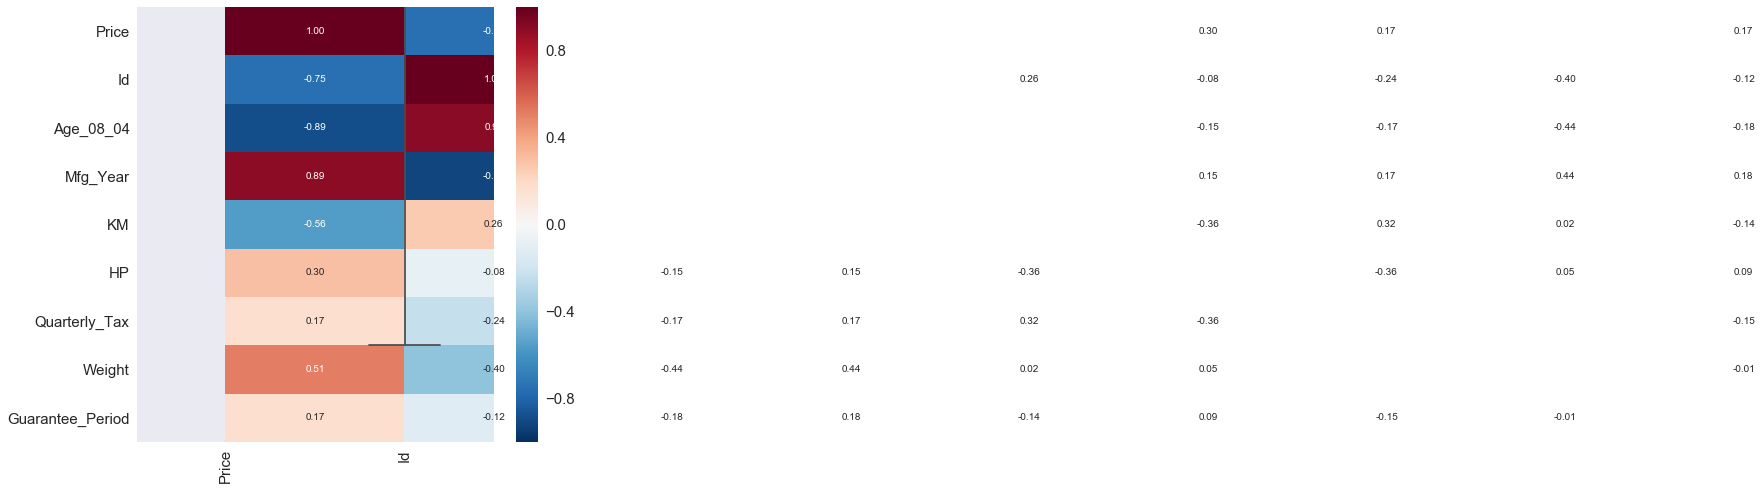

In [89]:

sns.boxplot(x=y_train ,)
plt.show()
#이상치가 상당히 많은것으로 파악된다

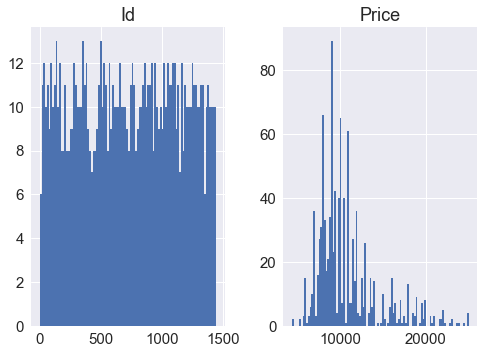

In [90]:
y.hist(bins=100)
plt.show()
#9,000EUR정도에 많은 분포가 있는 것 같다

# 2. 종속변수와 양적변수의 상관관계

* H0: 두개의 양적인 자료 간에는 직선의 관계가 없다
* H1: 두개의 양적인 자료간에는 직선의 관계가 있다

In [91]:
##Price의 정규성 검정
shap1= stats.shapiro(y_train["Price"])
print shap1

#정규성 가정이 깨지므로 kendal 사용

(0.8637189269065857, 3.2807347006748073e-25)


In [97]:
# 1)  Age_08_04
stats.kendalltau(y_train["Price"], X_train["Age_08_04"])
#직선의 관계가 있다

KendalltauResult(correlation=-0.67257004765982054, pvalue=2.3790189739900064e-170)

In [98]:
# 2) KM
stats.kendalltau(y_train["Price"], X_train["KM"])
#직선의 관계가 있다

KendalltauResult(correlation=-0.43345824998366528, pvalue=6.8215114121789289e-72)

In [99]:
# 3) Quarterly_Tax
stats.kendalltau(y_train["Price"], X_train["Quarterly_Tax"])
#직선의 관계가 있다


KendalltauResult(correlation=0.24871959091061882, pvalue=7.9363649824124793e-25)

In [100]:
# 4) Guarantee_Period
stats.kendalltau(y_train["Price"], X_train["Guarantee_Period"])
#직선의 관계가 있다


KendalltauResult(correlation=0.059953242104934606, pvalue=0.013137163352841787)

In [101]:
# 5) HP
stats.kendalltau(y_train["Price"], X_train["HP"])
#직선의 관계가 있다

KendalltauResult(correlation=0.1824389043130677, pvalue=4.4615833104475043e-14)

In [102]:
# 6) Weight
stats.kendalltau(y_train["Price"], X_train["Weight"])
#직선의 관계가 있다

KendalltauResult(correlation=0.30588049634091113, pvalue=1.0758742039244464e-36)

In [103]:
# 7) Mfg_Year
stats.kendalltau(y_train["Price"], X_train["Mfg_Year"])
#직선의 관계가 있다

KendalltauResult(correlation=0.73289129387729846, pvalue=6.8809105073177398e-202)

=> 양적변수 7개와 종속변수 Price는 통계적으로 직선의 관계가 있다

# 3. 질적변수 파악을 위한 독립2표본 검정

* H0: 2개 집단간의 Price의 평균은 차이가 없다
* H1: 2개 집단간의 Price의 평균은 차이가 있다
<p>대립가설이 성립하면 질적변수에 따른 Price는 차이가 있고, 영향을 준다고 생각할 수 있음

### 값이 2개인 질적변수
Met_color, Automatic, Mfr_Guarantee, BOVAG_Guarantee, ABS, Airbag_1, Airbag_2, Automatic_airco, Boardcomputer, CD_Player, Central_Lock, Powered_Windows, Power_Steering, Radio, Mistlamps, Sport_Model, Backseat_Divider, Metallic_Rim, Radio_cassette, Parking_Assistant, Tow_Bar

In [104]:


ind2test = ['Airco','Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

train_set = pd.concat([y_train, X_train[ind2test] ], axis = 1)
train_set.head()
#dft = X_test[ind2test] #20개(price빼고)
#dft.head()

,Price,Id,Airco,Met_Color,Automatic,Mfr_Guarantee,BOVAG_Guarantee,ABS,Airbag_1,Airbag_2,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
160,13500,264,1,0,0,0,1,1,1,0,...,1,1,1,0,0,0,0,1,0,1
876,7750,1089,1,0,0,0,1,0,1,0,...,1,1,0,0,0,1,0,0,0,1
935,7250,1328,0,1,0,1,1,1,1,1,...,1,1,0,1,0,1,1,0,0,1
347,10950,840,1,1,0,0,1,1,1,1,...,1,1,0,1,0,1,1,0,0,1
924,7350,947,0,0,0,0,0,1,1,1,...,0,1,0,0,1,1,0,0,0,0


In [105]:
def myself_2test(value):
    print "<<{}>>".format(value)
    normal_test1 = stats.shapiro(train_set.loc[train_set[value]==0].Price) # 정규성 검정
    normal_test2 = stats.shapiro(train_set.loc[train_set[value]==1].Price)


    print "<정규성 검정>"
    print normal_test1
    print normal_test2
    # Met_Color : 정규성

    if normal_test1[1] > 0.05 and normal_test2[1] > 0.05: #정규성이 만족한다면 등분산 검정을 실시한다
        print "정규성 검정은 만족한다"
        print "<등분산 검정>"
        lev = stats.levene(train_set.loc[train_set[value]==0].Price, \
                           train_set.loc[train_set[value]==1].Price, center="mean")
        print lev
        
    else: #비모수적 순위합
        ttest = stats.ranksums(train_set.loc[train_set[value]==0].Price, train_set.loc[train_set[value]==1].Price)
        print ttest
        if ttest.pvalue < 0.025:
            print "{}의 집단과 Price는 영향이 있다".format(value)
            print 
            print
            return
        else :
            print "{}의 집단과 Price는 영향이 없다".format(value)
            print
            print
            return
            
        
        
        
    if lev.pvalue > 0.5: # 등분산 검정을 만족한다면  등분산이 가정된 독립표본 T검정 실시
        print "<등분산ttest>"
        ttest = stats.ttest_ind(train_set.loc[train_set[value] == 0].Price, train_set.loc[train_set[value]==1].Price, equal_var=True)
        print ttest #등분산 ttest결과 출력
        print # 줄띄우기
    else:#이분산 
        print "<이분산 ttest>"
        ttest = stats.ttest_ind(train_set.loc[train_set[value] == 0].Price, train_set.loc[train_set[value]==1].Price, equal_var=False)
        print ttest #이분산 ttest결과 출력
        print # 줄띄우기
        
       ############결론#################
    if ttest.pvalue < 0.05:
        print "{}의 집단과 Price는 영향이 있다".format(value)
        print 
        print
    else :
        print "{}의 집단과 Price는 영향이 없다".format(value)
        print
        print
        
        
#########################################################################################
ind2test = ['Airco','Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', \
            'Airbag_1', 'Airbag_2', 'Automatic_airco', 'Boardcomputer', 'CD_Player',\
            'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', \
            'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
            'Parking_Assistant', 'Tow_Bar']
train_set = pd.concat([y_train, X_train[ind2test] ], axis = 1)

for i in ind2test:
    myself_2test(i)


<<Airco>>
<정규성 검정>
(0.9376948475837708, 1.2832427828679549e-11)
(0.9081220030784607, 2.1233137318700523e-14)
RanksumsResult(statistic=-13.348988978878969, pvalue=1.2006741117769964e-40)
Airco의 집단과 Price는 영향이 있다


<<Met_Color>>
<정규성 검정>
(0.8647238612174988, 4.836248453576539e-14)
(0.8673000931739807, 1.7485756428474247e-20)
RanksumsResult(statistic=-2.7091567782943446, pvalue=0.0067454456737201926)
Met_Color의 집단과 Price는 영향이 있다


<<Automatic>>
<정규성 검정>
(0.8640649318695068, 1.778676237438024e-24)
(0.8489997386932373, 4.120494122616947e-05)
RanksumsResult(statistic=-2.155684522959525, pvalue=0.031108307509111623)
Automatic의 집단과 Price는 영향이 없다


<<Mfr_Guarantee>>
<정규성 검정>
(0.8366546034812927, 3.8465356551104125e-21)
(0.8791967630386353, 5.460502503043833e-15)
RanksumsResult(statistic=-5.326754136624297, pvalue=9.9983354347523883e-08)
Mfr_Guarantee의 집단과 Price는 영향이 있다


<<BOVAG_Guarantee>>
<정규성 검정>
(0.8393939733505249, 2.3835493578872047e-08)
(0.8618642687797546, 6.521849158207729e-24)
Ranksum

In [106]:
#Gear

ind2test = ['Gears']
train_set = pd.concat([y_train, X_train[ind2test] ], axis = 1)


normal_test1 = stats.shapiro(train_set.loc[train_set["Gears"]==5].Price) # 정규성 검정
normal_test2 = stats.shapiro(train_set.loc[train_set["Gears"]==6].Price)



print normal_test1
print normal_test2
#정규성 깨짐

(0.8655371069908142, 1.0684087553432765e-24)
(0.6020820736885071, 9.510246741228912e-07)


In [107]:
#gears의 ranksum
ttest = stats.ranksums(train_set.loc[train_set["Gears"]==5].Price, train_set.loc[train_set["Gears"]==6].Price)
print ttest
#통계적으로 영향을 미친다

RanksumsResult(statistic=-1.9566384927358369, pvalue=0.050389986037121304)


# 4. 분산분석

* H0 : 변수의 데이터에 따른 Price는 차이가 없다
* H1 : 변수의 데이터에 따른 price는 차이가 있다.

### 값이 2개 이상인 질적변수
> Fuel_Type, Color, Doors
* 애매한 것 : Guarantee_Period, HP, CC(구간별 나눔 필요)

1) Fuel_Type

In [108]:
print X_train.Fuel_Type.unique()

['Petrol' 'Diesel' 'CNG']


In [109]:
#1. 정규성 검정

train_set = pd.concat([y_train, X_train.Fuel_Type ], axis = 1)

anova_1 = stats.shapiro(train_set.loc[train_set["Fuel_Type"] == "Diesel"].Price)
anova_2 = stats.shapiro(train_set.loc[train_set["Fuel_Type"] == "Petrol"].Price)
anova_3 = stats.shapiro(train_set.loc[train_set["Fuel_Type"] == "CNG"].Price)

print anova_1
print anova_2
print anova_3


#결론 : 정규성 깨짐


(0.818153977394104, 1.0187792831573006e-08)
(0.8672724962234497, 1.9526879090771063e-23)
(0.9243607521057129, 0.4662356972694397)


In [110]:
#2. kRUSKAL
stats.kruskal(train_set.loc[train_set["Fuel_Type"] == "Diesel"].Price,\
              train_set.loc[train_set["Fuel_Type"] == "Petrol"].Price,\
              train_set.loc[train_set["Fuel_Type"] == "CNG"].Price)
#통계적 영향 있음            

KruskalResult(statistic=2.739135019676803, pvalue=0.25421688208129323)

2) Color

In [111]:
print X_train.Color.unique()

['Green' 'Blue' 'Black' 'Silver' 'Grey' 'Red' 'White' 'Violet' 'Beige'
 'Yellow']


In [112]:
train_set = pd.concat([y_train, X_train.Color], axis = 1)

#1. 정규성 검정
anova_1 = stats.shapiro(train_set.loc[train_set["Color"] == "Blue"].Price)
anova_2 = stats.shapiro(train_set.loc[train_set["Color"] == "Silver"].Price)
anova_3 = stats.shapiro(train_set.loc[train_set["Color"] == "Black"].Price)
anova_4 = stats.shapiro(train_set.loc[train_set["Color"] == "Red"].Price)
anova_5 = stats.shapiro(train_set.loc[train_set["Color"] == "Grey"].Price)
anova_6 = stats.shapiro(train_set.loc[train_set["Color"] == "Green"].Price)
anova_7 = stats.shapiro(train_set.loc[train_set["Color"] == "White"].Price)
#anova_8 = stats.shapiro(df.loc[df["Color"] == "Yellow"].Price)
#anova_9 = stats.shapiro(df.loc[df["Color"] == "Violet"].Price)
anova_10 = stats.shapiro(df.loc[df["Color"] == "Beige"].Price)

print anova_1
print anova_2
print anova_3
print anova_4
print anova_5
print anova_6
print anova_7
#print anova_8
#print anova_9
print anova_10


#정규성 꺠짐

(0.8707839846611023, 2.7475341446425716e-10)
(0.800410270690918, 4.8237104977033596e-08)
(0.8746741414070129, 4.421208998905968e-08)
(0.9233149886131287, 2.401040433142043e-07)
(0.8848559260368347, 2.012215283286878e-09)
(0.9085529446601868, 9.57767156251066e-07)
(0.9548833966255188, 0.6387376189231873)
(0.7741675972938538, 0.05421370640397072)


In [113]:
#2. kRUSKAL
stats.kruskal(train_set.loc[train_set["Color"] == "Blue"].Price, \
              train_set.loc[train_set["Color"] == "Silver"].Price,\
              train_set.loc[train_set["Color"] == "Black"].Price,\
              train_set.loc[train_set["Color"] == "Red"].Price,\
              train_set.loc[train_set["Color"] == "Grey"].Price,\
              train_set.loc[train_set["Color"] == "Green"].Price,\
              train_set.loc[train_set["Color"] == "White"].Price,\
              train_set.loc[train_set["Color"] == "Beige"].Price)
              
#통계적으로 유의미함            
              

KruskalResult(statistic=24.458767866265127, pvalue=0.0009459286028579971)

3) Doors

In [114]:
print X_train.Doors.unique()

[4 5 3]


In [115]:
train_set = pd.concat([y_train, X_train.Doors ], axis = 1)

#1. 정규성 검정
#anova_1 = stats.shapiro(df.loc[df["Doors"] == 2].Price)
anova_2 = stats.shapiro(train_set.loc[train_set["Doors"] == 3].Price)
anova_3 = stats.shapiro(train_set.loc[train_set["Doors"] == 4].Price)
anova_4 = stats.shapiro(train_set.loc[train_set["Doors"] == 5].Price)

#print anova_1
print anova_2
print anova_3
print anova_4


#결론 : 정규성 깨짐

(0.8646108508110046, 1.2621401042508894e-16)
(0.782764196395874, 7.195998907860712e-09)
(0.8864050507545471, 1.5485817389496886e-15)


In [116]:
#2. kRUSKAL
stats.kruskal(train_set.loc[train_set["Doors"] == 3].Price,\
             train_set.loc[train_set["Doors"] == 4].Price,\
             train_set.loc[train_set["Doors"] == 5].Price)
#Statistic이 F값
#결론: 해당 변수의 데이터는 Price에 영향을 미침

KruskalResult(statistic=32.905791517369309, pvalue=7.1548109120138665e-08)

# 5. 양적 변수의 Categorization

분류하기 애매한 변수 : Guarantee_Period, HP, CC(구간별 나눔 필요)

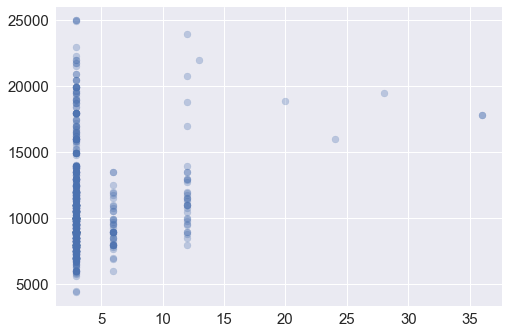

3     680
6      44
12     34
36      2
28      1
24      1
20      1
13      1
Name: Guarantee_Period, dtype: int64

In [117]:
#1) Guarantee_Period


plt.scatter(X_train.Guarantee_Period, y_train["Price"], alpha=0.3)
plt.show()

X_train.Guarantee_Period.value_counts()
#선형의 관계가 성립하지 않는다


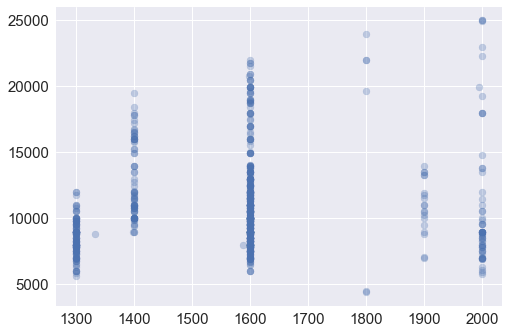

[1300 1332 1398 1400 1587 1598 1600 1800 1900 1995 2000]


1600    462
1300    131
1400     80
2000     61
1900     19
1800      6
1995      1
1598      1
1587      1
1398      1
1332      1
Name: CC, dtype: int64

In [118]:
#2) CC
plt.scatter(X_train.CC, y_train["Price"], alpha=0.3)
plt.show() #스케일된 KM과 Pricez
#구간을 3~4개로 나눠볼까

print np.sort(X_train.CC.unique())
X_train.CC.value_counts()

In [119]:
train_set = (X_train
            .assign (CC_new = X_train.CC))

train_set.head()
train_set.CC_new[0]
train_set.shape

CC = train_set.CC_new

plt.scatter(train_set.CC_new, y_train, alpha=0.3)
plt.show() #스케일된 KM과 Pricez

ValueError: x and y must be the same size

In [120]:
i = 0

while i < len(CC):
    if CC.iloc[i] < 1500 :
        CC.iloc[i] = 1 # 소형차
    elif CC.iloc[i] >= 1500 & CC.iloc[i] < 2000:
        CC.iloc[i] = 2 #중형차
    else:
        CC.iloc[i] = 3 #대형차
    i += 1
    


KeyboardInterrupt: 

In [121]:
train_set.head()


plt.scatter(train_set.CC_new, y_train, alpha=0.3)
plt.show() #스케일된 KM과 Pricez
#카테고리화 했을 때 통계적으로 유의미한 관계가 있을것으로 보이지 않는다


ValueError: x and y must be the same size

In [ ]:
train_set.CC_new.value_counts()

In [ ]:
#3)HP
plt.scatter(X_train.HP,y_train["Price"], alpha=0.3)
plt.show()
np.sort(X_train.HP.unique())
X_train.HP.value_counts()

In [ ]:
#결론 : 카테고리화를 해야 할지, 양적 변수로 써야 할지 판단이 잘 서지 않는다

# 6. Dummy variable 

### 6-1) Options변수
Boolean값을 가지는 변수는 '유,무'로 판단하여 보유 개수를 표시하는 새로운 변수 Options로 변환한다

In [122]:
OptionList = [ 'Met_Color', 'Mfr_Guarantee', 'Airco','ABS', 'Airbag_1', 
            'Airbag_2', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Mistlamps', 'Backseat_Divider', 
            'Metallic_Rim', 'Tow_Bar', 'Gears'] #18개

test_set = X_train[OptionList]
option_temp = (test_set
            .assign(Options = lambda x:x.sum(axis=1) ))

option_temp.head()


,Met_Color,Mfr_Guarantee,Airco,ABS,Airbag_1,Airbag_2,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Mistlamps,Backseat_Divider,Metallic_Rim,Tow_Bar,Gears,Options
160,0,0,1,1,1,0,0,0,0,1,1,0,0,0,1,5,11
876,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,5,11
935,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,5,16
347,1,0,1,1,1,1,0,0,0,1,1,1,1,1,1,5,16
924,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,5,9


In [123]:
cols_real = ['Mfg_Year','KM','Weight', 'HP'] # HP는 애매하지만 일단 양적으로
X_processed = pd.concat([X_train[cols_real], option_temp.Options], axis = 1)

X_processed.head() #1차 최종 양적변수 DataFrame

,Mfg_Year,KM,Weight,HP,Options
160,2001,50856,1030,110,11
876,1998,134539,1070,110,11
935,1998,66880,1055,110,16
347,1999,67146,1075,110,16
924,1999,54000,1035,86,9


### 6-2) 3개이상 값을 가지는 질적 변수의 dummy변환

Fuel_Type
<p> Color
<p> Doors

1) Doors

In [124]:
Doors_d = pd.get_dummies(X_train.Doors)
Doors_d.head()


,3,4,5
160,0,1,0
876,0,0,1
935,1,0,0
347,0,0,1
924,0,0,1


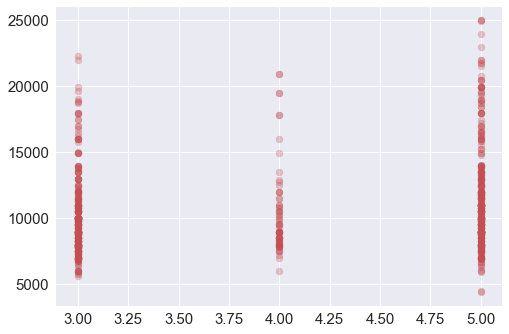

In [125]:
plt.scatter(X_train.Doors, y_train.Price, alpha = 0.3)
plt.show()
#눈으로 보기에는 선형의 관계가 성립하는 것 처럼 보이지 않는다

In [126]:
#단독 독렵변수 OLS
test_set = pd.concat([y_train.Price, Doors_d], axis = 1)
test_set.head()
model = smf.ols("Price~Doors_d", data = test_set).fit()
#model.summary()

# doors 단독으로는 adj-Rsquared값이 매우 미미하고 
#독립변수의 P-value를 봤을 시 통계적으로 유의한 영향을 미치지 않는 것으로 보인다

In [127]:
#다른 양적변수와 함께 OLS
X_processed_test = pd.concat([test_set, X_processed], axis =1)
X_processed_test.head()

model = smf.ols("Price~Mfg_Year + KM + Weight + HP+ Doors_d", data = X_processed_test).fit()
#model.summary()

2) Color

In [128]:
Color_d = pd.get_dummies(X_train.Color)
Color_d.head()

#단독 독렵변수 OLS
test_set = pd.concat([y_train.Price, Color_d], axis = 1)
test_set.head()
model = smf.ols("Price~Color_d", data = test_set).fit()
#model.summary()

In [129]:
#다른 양적변수와 함께 OLS
X_processed_test = pd.concat([test_set, X_processed], axis =1)
X_processed_test.head()

model = smf.ols("Price~Mfg_Year + Weight+Options+KM +HP+Color_d", data = X_processed_test).fit()
#model.summary()

3) Fuel_Type

In [130]:
FuelType_d = pd.get_dummies(X_train.Fuel_Type)
FuelType_d.head()


,CNG,Diesel,Petrol
160,0,0,1
876,0,0,1
935,0,0,1
347,0,0,1
924,0,0,1


In [131]:
#단독 독렵변수 OLS
test_set = pd.concat([y_train.Price, FuelType_d], axis = 1)
test_set.head()
model = smf.ols("Price~FuelType_d", data = test_set).fit()
#model.summary()


* 결론: 세가지 질적변수는 제외하기로 한다

# 7. Feature Selection을 위한 양적변수의 OLS Report수치 분석

<p>Mfg_Year
<p>KM
<p>Weight
<p>HP
<p>Options

In [132]:
X_processed.head()
OLS_test = pd.concat([y_train["Price"], X_processed], axis =1)
OLS_test.head()


,Price,Mfg_Year,KM,Weight,HP,Options
160,13500,2001,50856,1030,110,11
876,7750,1998,134539,1070,110,11
935,7250,1998,66880,1055,110,16
347,10950,1999,67146,1075,110,16
924,7350,1999,54000,1035,86,9


### 7-1) 다중공선성

In [133]:
vif_dic= {}

# 1) Mfg_Year
model = smf.ols(formula = " Mfg_Year~Weight+Options+HP+KM", data = OLS_test).fit()
rsquared = model.rsquared
rsquared
vif = 1/(1-rsquared)
vif_dic["Mfg_Year"] = vif

# 2) Weight
model = smf.ols(formula = " Weight~Mfg_Year+Options+HP+KM", data = OLS_test).fit()
rsquared = model.rsquared
rsquared
vif = 1/(1-rsquared)
vif_dic["Weight"] = vif

# 3) Options
model = smf.ols(formula = " Options~Weight+Mfg_Year+HP+KM", data = OLS_test).fit()
rsquared = model.rsquared
rsquared
vif = 1/(1-rsquared)
vif_dic["Options"] = vif

# 4) HP
model = smf.ols(formula = " HP~Weight+Options+Mfg_Year+KM", data = OLS_test).fit()
rsquared = model.rsquared
rsquared
vif = 1/(1-rsquared)
vif_dic["HP"] = vif

# 5) KM
model = smf.ols(formula = " KM~Weight+Options+HP+Mfg_Year", data = OLS_test).fit()
rsquared = model.rsquared
rsquared
vif = 1/(1-rsquared)
vif_dic["KM"] = vif


vif_dic

{'HP': 1.2669100198389511,
 'KM': 1.6884332240580862,
 'Mfg_Year': 2.2042297893470368,
 'Options': 1.4728395523958344,
 'Weight': 1.3921912973273101}

### 7-2) OLS

In [134]:
model = smf.ols("Price~Mfg_Year + KM + Weight + HP + Options", data = OLS_test).fit()
#model.summary()


In [135]:
model = smf.ols("Price~Mfg_Year + KM + Weight  ", data = OLS_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1450.
Date:                Thu, 29 Jun 2017   Prob (F-statistic):          6.92e-314
Time:                        16:49:56   Log-Likelihood:                -6590.5
No. Observations:                 764   AIC:                         1.319e+04
Df Residuals:                     760   BIC:                         1.321e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.161e+06   8.61e+04    -36.708      0.000   -3.33e+06   -2.99e+06
Mfg_Year    1579.3453     43.339     36.442      0.000    1494.268    1664.423
KM            -0.0204      0.002    -13.125      0.000      -0.023      -0.017
Weight        14.0780      1.089     12.922      0.000      11.939      16.217
==============================================================================
Omnibus:                       97.812   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              554.334
Skew:                          -0.406   Prob(JB):                    4.25e-121
Kurtosis:                       7.093   Cond. No.                     1.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
model = smf.ols("Price~Mfg_Year + KM + Weight  ", data = OLS_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1450.
Date:                Thu, 29 Jun 2017   Prob (F-statistic):          6.92e-314
Time:                        16:49:57   Log-Likelihood:                -6590.5
No. Observations:                 764   AIC:                         1.319e+04
Df Residuals:                     760   BIC:                         1.321e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.161e+06   8.61e+04    -36.708      0.000   -3.33e+06   -2.99e+06
Mfg_Year    1579.3453     43.339     36.442      0.000    1494.268    1664.423
KM            -0.0204      0.002    -13.125      0.000      -0.023      -0.017
Weight        14.0780      1.089     12.922      0.000      11.939      16.217
==============================================================================
Omnibus:                       97.812   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              554.334
Skew:                          -0.406   Prob(JB):                    4.25e-121
Kurtosis:                       7.093   Cond. No.                     1.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
model = smf.ols("Price~Mfg_Year + KM   ", data = OLS_test).fit()
#model.summary()

In [138]:
model = smf.ols("Price~Mfg_Year +Weight   ", data = OLS_test).fit()
#model.summary()

In [139]:
model = smf.ols("Price~Mfg_Year + Options", data = OLS_test).fit()
#model.summary()

In [140]:
model = smf.ols("Price~Mfg_Year + Options", data = OLS_test).fit()
#model.summary()

In [141]:
model = smf.ols("Price~Mfg_Year+Weight+ Options", data = OLS_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1233.
Date:                Thu, 29 Jun 2017   Prob (F-statistic):          1.79e-291
Time:                        16:50:00   Log-Likelihood:                -6642.4
No. Observations:                 764   AIC:                         1.329e+04
Df Residuals:                     760   BIC:                         1.331e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.523e+06   8.49e+04    -41.480      0.000   -3.69e+06   -3.36e+06
Mfg_Year    1761.2703     42.739     41.209      0.000    1677.369    1845.172
Weight         9.0744      1.110      8.173      0.000       6.895      11.254
Options      145.2199     19.788      7.339      0.000     106.374     184.065
==============================================================================
Omnibus:                       88.205   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.957
Skew:                          -0.350   Prob(JB):                    7.32e-104
Kurtosis:                       6.799   Cond. No.                     3.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
model = smf.ols("Price~Mfg_Year + KM + Weight + Options", data = OLS_test).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1192.
Date:                Thu, 29 Jun 2017   Prob (F-statistic):               0.00
Time:                        16:50:00   Log-Likelihood:                -6560.0
No. Observations:                 764   AIC:                         1.313e+04
Df Residuals:                     759   BIC:                         1.315e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.895e+06   8.93e+04    -32.422      0.000   -3.07e+06   -2.72e+06
Mfg_Year    1445.8335     44.928     32.181      0.000    1357.636    1534.031
KM            -0.0202      0.001    -13.519      0.000      -0.023      -0.017
Weight        13.5075      1.050     12.865      0.000      11.446      15.569
Options      141.2806     17.778      7.947      0.000     106.380     176.181
==============================================================================
Omnibus:                       74.702   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.999
Skew:                          -0.096   Prob(JB):                    6.45e-102
Kurtosis:                       6.821   Cond. No.                     1.49e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
model = smf.ols("Price~Mfg_Year + Weight + Options", data = OLS_test).fit()
#model.summary()


# 8. Cross Validation

### 8_1) validation data에 Options column추가

In [144]:
X_test.head()

,Age_08_04,Mfg_Year,KM,HP,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
267,42,2001,55400,110,1600,5,4,5,85,1075,...,0,1,0,0,0,1,0,0,0,1
142,42,2001,42560,110,1600,5,4,5,85,1080,...,1,1,0,1,0,1,0,0,0,0
838,73,1998,87000,86,1300,3,4,5,69,1015,...,0,1,1,0,0,0,0,1,0,0
175,49,2000,36000,110,1600,5,4,5,85,1080,...,1,1,0,1,0,1,0,0,0,0
481,63,1999,47612,86,1300,3,4,5,69,1015,...,0,1,0,0,1,1,0,0,0,0


In [145]:
y_test.head()

,Price,Id
267,11750,251
142,13950,296
838,7950,1217
175,13000,573
481,9950,975


In [146]:
OptionList = [ 'Met_Color', 'Mfr_Guarantee', 'Airco','ABS', 'Airbag_1', 
            'Airbag_2', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Mistlamps', 'Backseat_Divider', 
            'Metallic_Rim', 'Tow_Bar', 'Gears'] #18개

selected_real = ['Mfg_Year', 'KM', 'Weight', 'HP'] #테스트  셋의 양적변수


X1 = X_test[OptionList] # 질적변수 추출
X2 = X_test[selected_real] # 양적변수 추출

X3 = (X1
      .assign(Options = lambda x:x.sum(axis = 1))) #options 변수 만듬

X4 = pd.concat([X2, X3.Options], axis =1)



In [147]:

#모형 변수를 넣는다

selected_col = ['Mfg_Year', 'KM','Weight']


X_train_model = OLS_test[selected_col] # train 의 독립변수
X_test_model = X4[selected_col]
y_train_model = y_train# train의 종속변수
y_test_model = y_test # test의 종속변수
y_train_model.head()



,Price,Id
160,13500,264
876,7750,1089
935,7250,1328
347,10950,840
924,7350,947


In [148]:
print X_train_model.shape, X_test_model.shape

(764, 3) (255, 3)


### 8_2) RMSE와 R2평가

In [149]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

model = linear_model.LinearRegression()
model.fit (X_train_model, y_train_model) # 학습시킴

y_train_pred = model.predict(X_train_model) #train의 예측값
y_test_pred = model.predict (X_test_model) # test의 예측값

rmse_train =np.sqrt(metrics.mean_squared_error (y_train_model, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test_model, y_test_pred))  # mse값 비교

##################################

r2_train = r2_score(y_train_model, y_train_pred)
r2_test = r2_score(y_test_model, y_test_pred) # r2값 비교

##############################

print "Training Data => RMSE : {}, R2 : {}".format(rmse_train, r2_train)
print "Test Data => RMSE:{} , R2:{}". format(rmse_test, r2_test)

Training Data => RMSE : 958.48806592, R2 : 0.851945066474
Test Data => RMSE:981.072677615 , R2:0.8702499819


c:\python27\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)
c:\python27\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


* test의 MSE가 더 높으면 과적합
* R2는 더 높아야 함

# 9. 이상치 분석

* 이상치: 표준화된 잔차의 절대값이 3 이상
* 영향점 : cook's D >1 or DFFIT의 절대값 >2

1) KM

-0.187009869999


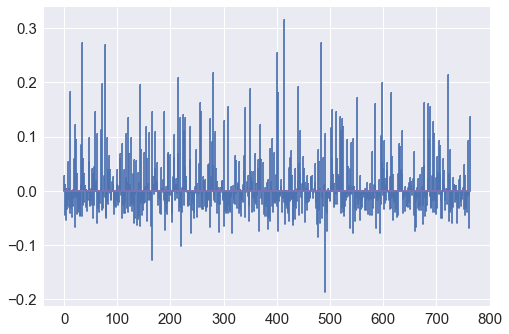

In [150]:
model = smf.ols("y_train_model.Price~KM", data = X_train_model).fit()
#model.summary()
influence = model.get_influence()
(c, p) = influence.dffits
#c: distance / p:p-value
plt.stem(np.arange(len(c)), c, markerfmt =',') 
print c.min()
plt.show() # dffit

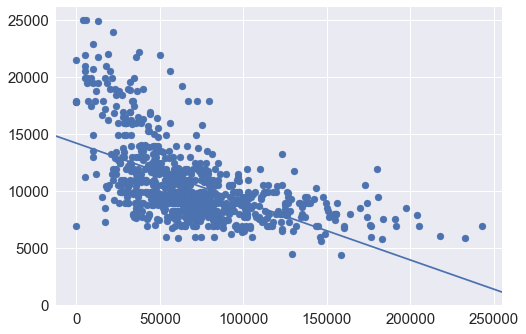

hat.sum() = 2.0


In [151]:
plt.scatter(X_train_model.KM, y_train_model.Price)
sm.graphics.abline_plot(model_results = model, ax=plt.gca())
hat = influence.hat_matrix_diag
idx = hat > 0.05
plt.scatter(X_train_model.KM[idx], y_train_model.Price[idx], s=300, c='r', alpha =0.5)
#plt.axis([0, 20000, 0, 35000])
plt.show()
print "hat.sum() = {}".format(hat.sum())

#레버

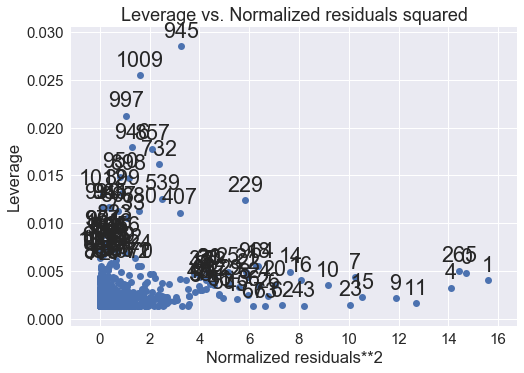

In [152]:
sm.graphics.plot_leverage_resid2(model)
plt.show()

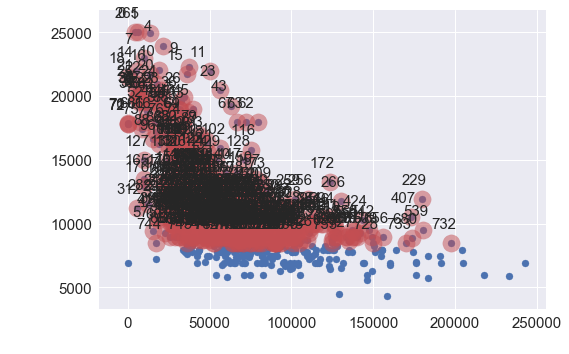

In [153]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(X_train_model.KM, y_train_model.Price)
plt.scatter(X_train_model.KM[idx], y_train_model.Price[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, zip(X_train_model.KM[idx], y_train_model.Price[idx]), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()


#Fox Recommendation으로 Outlier판단

In [154]:
print X_train_model.KM[77],  y_train_model.Price[77], y_train_model.Id[77]

#이상치가 의심되는 첫번째 값은 가장 최근년도 생산, 보유 옵션등을 봤을때 가격이 높을 것으로 고려. 수정하지 않음 

17300 17200 152


In [155]:
print X_train_model.KM[134],  y_train_model.Price[134], y_train_model.Id[134]
#

48952 14750 270


> index 77, 134의 값에 평균의 값을 대입 해 보았으나 수치가 더 나빠짐

2) Weight

In [156]:
model = smf.ols("y_train_model.Price~Weight", data = X_train_model).fit()

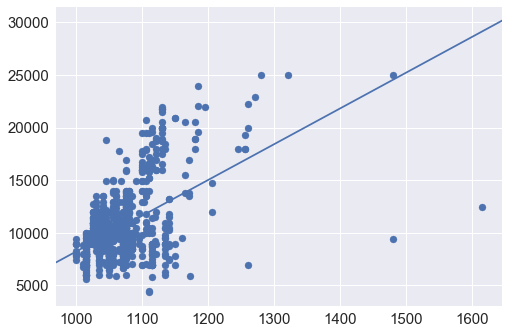

hat.sum() = 2.0


In [157]:
#레버리지: 0.05 넘는 데이터 표시

plt.scatter(X_train_model.Weight, y_train_model.Price)
sm.graphics.abline_plot(model_results = model, ax=plt.gca())
hat = influence.hat_matrix_diag
idx = hat > 0.05
plt.scatter(X_train_model.Weight[idx], y_train_model.Price[idx], s=300, c='r', alpha =0.5)
#plt.axis([0, 20000, 0, 35000])
plt.show()
print "hat.sum() = {}".format(hat.sum())

#레버

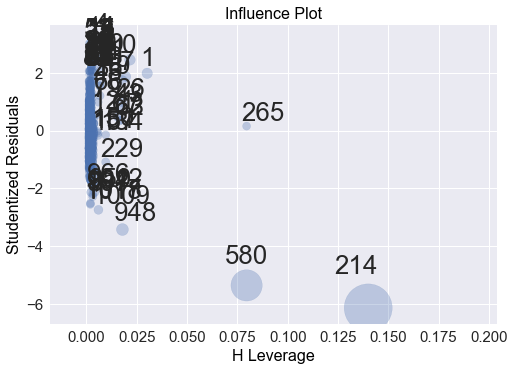

In [158]:
#Cook's Distance

sm.graphics.influence_plot(model, plot_alpha=0.3)
plt.show()

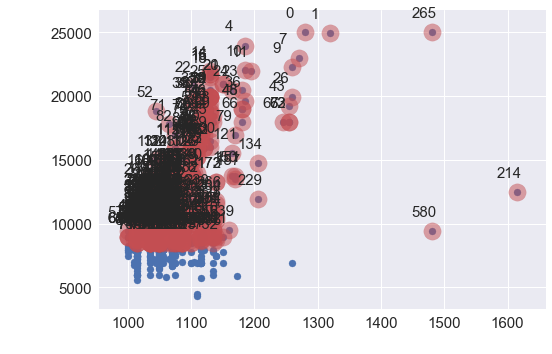

In [159]:

#Fox Recommendation으로 Outlier판단

from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train_model.Price) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(X_train_model.Weight, y_train_model.Price)
plt.scatter(X_train_model.Weight[idx], y_train_model.Price[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, zip(X_train_model.Weight[idx], y_train_model.Price[idx]), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()


#Fox Recommendation으로 Outlier판단

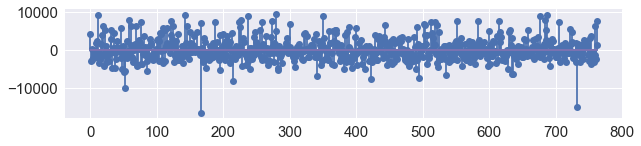

In [160]:
#위의 데이터로 정확히 판단하기가 애매해서 잔차 확인


plt.figure(figsize=(10, 2))
plt.stem(model.resid)
plt.show()

3) Mfg_Year

In [161]:
model = smf.ols("y_train_model.Price~Mfg_Year", data = X_train_model).fit()

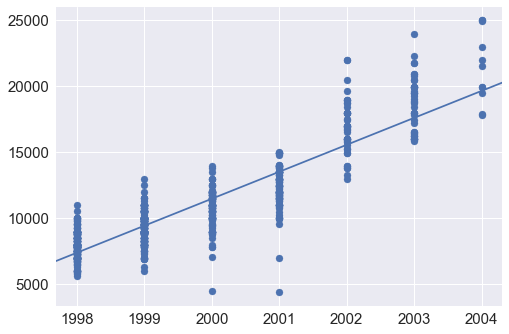

hat.sum() = 2.0


In [162]:
#레버리지: 0.05 넘는 데이터 표시

plt.scatter(X_train_model.Mfg_Year, y_train_model.Price)
sm.graphics.abline_plot(model_results = model, ax=plt.gca())
hat = influence.hat_matrix_diag
idx = hat > 0.05
plt.scatter(X_train_model.Mfg_Year[idx], y_train_model.Price[idx], s=300, c='r', alpha =0.5)
#plt.axis([0, 20000, 0, 35000])
plt.show()
print "hat.sum() = {}".format(hat.sum())

#레버

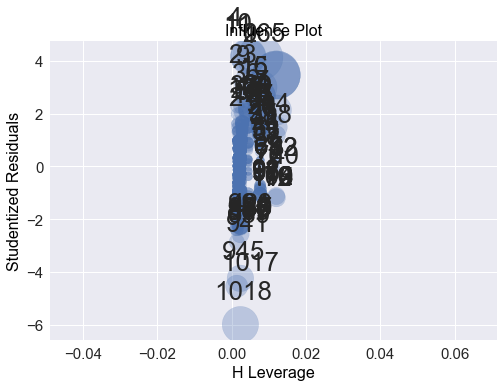

In [163]:
#Cook's Distance

sm.graphics.influence_plot(model, plot_alpha=0.3)
plt.show()

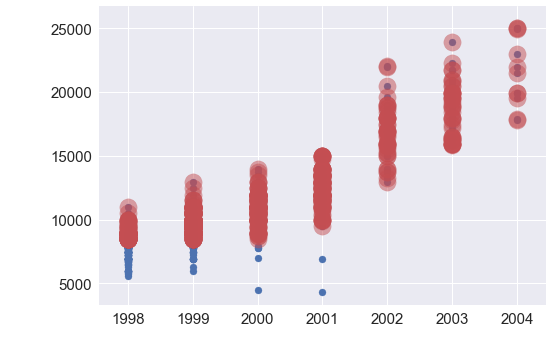

In [164]:

#Fox Recommendation으로 Outlier판단

from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train_model.Price) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(X_train_model.Mfg_Year, y_train_model.Price)
plt.scatter(X_train_model.Mfg_Year[idx], y_train_model.Price[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, zip(X_train_model.Weight[idx], y_train_model.Price[idx]), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()


#Fox Recommendation으로 Outlier판단

> 77번 index(Price의 최대값 데이터)가 높은 Leverage에 포함되어 해당 데이터 값을 낮춰보고자 한다

In [167]:
y_train_model.describe()
#75%의 값으로f - > 두번째 높은 값으로

sns.boxplot(y_train['Price'], palette='Set3', ax=ax)
plt.show()

In [420]:
#75%의 값으로
#y_train_model.Price[77] = 11750
#print y_train_model.Id[77]

112


# 10. 평가

In [168]:

#모형 변수를 넣는다

selected_col = ['Mfg_Year', 'KM','Weight', 'Options']


X_train_model = OLS_test[selected_col] # train 의 독립변수
X_test_model = X4[selected_col]
y_train_model = y_train# train의 종속변수
y_test_model = y_test # test의 종속변수
y_train_model.head()


,Price,Id
160,13500,264
876,7750,1089
935,7250,1328
347,10950,840
924,7350,947


In [170]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

model = linear_model.LinearRegression()
model.fit (X_train_model, y_train_model) # 학습시킴

y_train_pred = model.predict(X_train_model) #train의 예측값
y_test_pred = model.predict (X_test_model) # test의 예측값

rmse_train =np.sqrt(metrics.mean_squared_error (y_train_model, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test_model, y_test_pred))  # mse값 비교

##################################

r2_train = r2_score(y_train_model, y_train_pred)
r2_test = r2_score(y_test_model, y_test_pred) # r2값 비교

##############################

print "Training Data => RMSE : {}, R2 : {}".format(rmse_train, r2_train)
print "Test Data => RMSE:{} , R2:{}". format(rmse_test, r2_test)

Training Data => RMSE : 921.229031405, R2 : 0.863231937241
Test Data => RMSE:974.921394778 , R2:0.871871935015


c:\python27\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)
c:\python27\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


In [171]:
model = smf.ols("y_train_model.Price~Mfg_Year + KM + Weight+Options ", data = X_train_model).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     y_train_model.Price   R-squared:                       0.863
Model:                             OLS   Adj. R-squared:                  0.862
Method:                  Least Squares   F-statistic:                     1192.
Date:                 Thu, 29 Jun 2017   Prob (F-statistic):               0.00
Time:                         16:55:00   Log-Likelihood:                -6560.0
No. Observations:                  764   AIC:                         1.313e+04
Df Residuals:                      759   BIC:                         1.315e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.895e+06   8.93e+04    -32.422      0.000   -3.07e+06   -2.72e+06
Mfg_Year    1445.8335     44.928     32.181      0.000    1357.636    1534.031
KM            -0.0202      0.001    -13.519      0.000      -0.023      -0.017
Weight        13.5075      1.050     12.865      0.000      11.446      15.569
Options      141.2806     17.778      7.947      0.000     106.380     176.181
==============================================================================
Omnibus:                       74.702   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.999
Skew:                          -0.096   Prob(JB):                    6.45e-102
Kurtosis:                       6.821   Cond. No.                     1.49e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

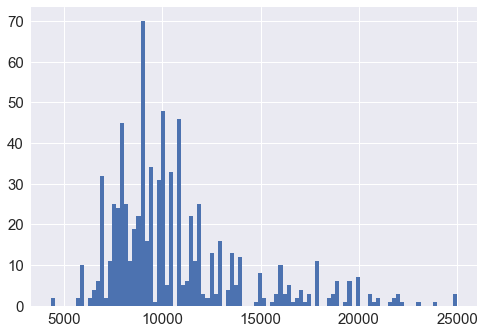

In [172]:
y_train_model.Price.hist(bins=100)
plt.show()

# 11. 최종 모델 선택

회귀식
* yhat =-2.895e+06+ (1445.8335 Mfg_Year) + (-0.0202 KM) + (13.5075	Weight) + (141.2806 Options)

In [446]:
df = pd.read_csv("file/train_mod.csv")


In [173]:
OptionList = [ 'Met_Color', 'Mfr_Guarantee', 'Airco','ABS', 'Airbag_1', 
            'Airbag_2', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Mistlamps', 'Backseat_Divider', 
            'Metallic_Rim', 'Tow_Bar', 'Gears'] #18개

selected_real = ['Price','Id', 'Mfg_Year', 'KM', 'Weight'] #테스트  셋의 양적변수


X1 = df[OptionList] # 질적변수 추출
X2 = df[selected_real] # 양적변수 추출

X3 = (X1
      .assign(Options = lambda x:x.sum(axis = 1))) #options 변수 만듬

X4 = pd.concat([X2, X3.Options], axis =1)

X4.head()

,Price,Id,Mfg_Year,KM,Weight,Options
0,24990,117,2004,6000,1280,17
1,24950,114,2004,13253,1320,14
2,24950,115,2004,13253,1320,14
3,24500,149,2003,19988,1130,19
4,23950,143,2003,21684,1185,12


In [174]:
selected_model = (X4
                .assign(Yhat = lambda x:-2.895e+06 + (1445.8335*x.Mfg_Year) + (-0.0202 *x.KM) + (13.5075 * x.Weight) + (141.2806*x.Options)))

In [176]:
selected_model


,Price,Id,Mfg_Year,KM,Weight,Options,Yhat
0,24990,117,2004,6000,1280,17,22020.5042
1,24950,114,2004,13253,1320,14,21990.4518
2,24950,115,2004,13253,1320,14,21990.4518
3,24500,149,2003,19988,1130,19,18548.5493
4,23950,143,2003,21684,1185,12,18268.2384
5,23750,173,2004,11000,1130,11,19045.6956
6,23000,140,2003,25000,1320,15,20448.6095
7,22950,116,2004,10000,1270,16,21663.3486
8,22750,17,2002,34000,1185,18,17421.3053
9,22250,92,2003,37500,1260,16,19526.9401


In [177]:
from pandas import DataFrame

In [178]:
selected_model.to_csv('selected_model.csv', sep=',', na_rep ='NaN')